dict_keys(['train_losses', 'test_losses', 'train_errs', 'test_errs', 'train_accs', 'test_acc', 'run_time', 'n_step'])


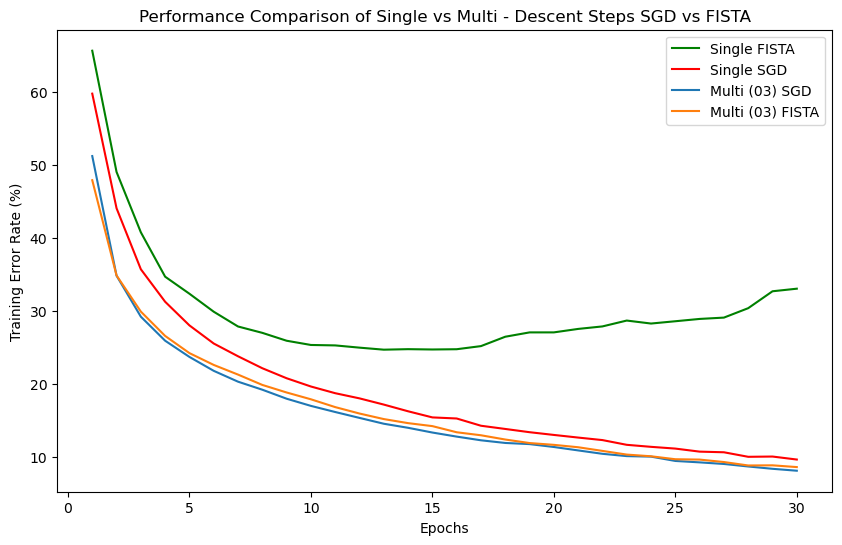

In [22]:
import json
import matplotlib.pyplot as plt

sngl_sgd = "/home/tung5534/cnn_cifar/W08/optimal_step_size/scores/E30T95/SGD_lr_0133_sngl.json"
mult_02_sgd = "/home/tung5534/cnn_cifar/W08/optimal_step_size/scores/E30T95/SGD_lr_0133_mult_02.json"
mult_03_sgd = "/home/tung5534/cnn_cifar/W08/optimal_step_size/scores/E30T95/SGD_lr_0133_mult_03.json"
mult_05_sgd = "/home/tung5534/cnn_cifar/W08/optimal_step_size/scores/E30T95/SGD_lr_0133_mult_05.json"
mult_08_sgd = "/home/tung5534/cnn_cifar/W08/optimal_step_size/scores/E30T95/SGD_lr_0133_mult_08.json"
mult_10_sgd = "/home/tung5534/cnn_cifar/W08/optimal_step_size/scores/E30T95/SGD_lr_0133_mult_10.json"

sngl_fista = "/home/tung5534/cnn_cifar/W08/fista_single/scores/FISTA_sngl_lr_0.0007.json"
mult_05_fista = "/home/tung5534/cnn_cifar/W08/fista_multi/scores/E30_ministeps_lr055/FISTA_5steps_lr_0.055.json"

sngl_scores = json.load(open(sngl_sgd, 'r'))
mult_02_scores = json.load(open(mult_02_sgd, 'r'))
mult_03_scores = json.load(open(mult_03_sgd, 'r'))
mult_05_scores = json.load(open(mult_05_sgd, 'r'))
mult_08_scores = json.load(open(mult_08_sgd, 'r'))
mult_10_scores = json.load(open(mult_10_sgd, 'r'))

sngl_fista_scores = json.load(open(sngl_fista, 'r'))
mult_05_fista_scores = json.load(open(mult_05_fista, 'r'))


print(sngl_scores.keys())
plt.figure(figsize=(10,6))
plt.plot(range(1, len(sngl_fista_scores['train_errs'][:30])+1), sngl_fista_scores['train_errs'][:30], linestyle='-', label='Single FISTA', color='green')
plt.plot(range(1, len(sngl_scores['train_errs'][:30])+1), sngl_scores['train_errs'][:30], linestyle='-', label='Single SGD', color='red')
plt.plot(range(1, len(mult_03_scores['train_errs'])+1), mult_03_scores['train_errs'], linestyle='-', label='Multi (03) SGD', alpha=1)
plt.plot(range(1, len(mult_05_fista_scores['train_errs'])+1), mult_05_fista_scores['train_errs'], linestyle='-', label='Multi (03) FISTA', alpha=1)

plt.xlabel('Epochs')
plt.ylabel('Training Error Rate (%)')
plt.title('Performance Comparison of Single vs Multi - Descent Steps SGD vs FISTA')
plt.legend()
plt.show()

In [24]:
def add_acc_run_time(scores):
    acc_value = 0
    acc_values = []
    for value in scores['run_time']:
        acc_value += value
        acc_values.append(acc_value)
    scores['acc_run_time'] = acc_values
    return scores

sngl_scores = add_acc_run_time(sngl_scores)
mult_03_scores = add_acc_run_time(mult_03_scores)
sngl_fista_scores = add_acc_run_time(sngl_fista_scores)
mult_05_fista_scores = add_acc_run_time(mult_05_fista_scores)

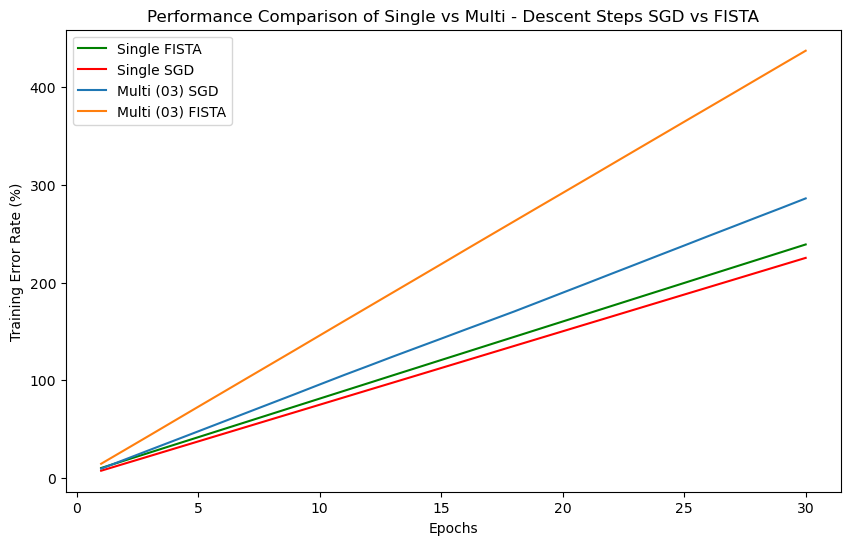

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(1, len(sngl_fista_scores['train_errs'][:30])+1), sngl_fista_scores['acc_run_time'][:30], linestyle='-', label='Single FISTA', color='green')
plt.plot(range(1, len(sngl_scores['train_errs'][:30])+1), sngl_scores['acc_run_time'][:30], linestyle='-', label='Single SGD', color='red')
plt.plot(range(1, len(mult_03_scores['train_errs'])+1), mult_03_scores['acc_run_time'], linestyle='-', label='Multi (03) SGD', alpha=1)
plt.plot(range(1, len(mult_05_fista_scores['train_errs'])+1), mult_05_fista_scores['acc_run_time'], linestyle='-', label='Multi (03) FISTA', alpha=1)

plt.xlabel('Epochs')
plt.ylabel('Training Error Rate (%)')
plt.title('Performance Comparison of Single vs Multi - Descent Steps SGD vs FISTA')
plt.legend()
plt.show()